<a href="https://colab.research.google.com/github/Vishal-Upendran/SunGan/blob/master/Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How to use this notebook
This notebook contains an implementation of the Sun predictor code. It uses a Unet-type generator and a CNN as a discriminator to perform prediction of Sun one day in advance.

This is my first time using Google Colab, so there might be inconsistency and errors in handling data. Apologies. However, heres the general flow of the nb:

1. The first couple of cells import libraries required for computation -  numpy, matplotlib primarily. skimage and sklearn are not relevant here. 
2. The pydrive and GoogleAuth are required to access the data files, model checkpoints and the class code for the model. Just follow the script as is given.
3. The model code has not been commented. The flow is quite intuitive- however, any questions please get back to me. I shall update this nb and the model in due course.
4. The model was trained using a batch size of 9. There is a separate training script which cannot be used here owing to size limitation by google.
5. Other relevant variables are explained in-situ.


In [0]:
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt
'''
  Ignore the messages below. Occurs due to use of mpl.use('Agg').
'''

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7

"\n  Ignore the messages below. Occurs due to use of mpl.use('Agg').\n"

In [0]:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
'''
  Please perform the appropriate authentication. It would involve linking your google
  account to Google Colab.
'''

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
your_module = drive.CreateFile({'id':'1oC7Wmd83E3e6eURBaNYFAFPGRfjY3UE1'})
your_module.GetContentFile('SunPredictorGan.py')
your_module = drive.CreateFile({'id':'1erm9H4hoNiRWXKXUqAOJGNAgvTw7Eagz'})
your_module.GetContentFile('tf_utils.py')
#your_module = drive.CreateFile({'id':'1P8lJSs8AGxPVf3JucsupbQSgRfQchJog'})
#your_module.GetContentFile('AE_test.npy')
'''
  I have my SolarNet class file, some general utilities and the testing data in drive.
  These ids are given. No need to edit anything here.
'''


'\n  I have my SolarNet class file, some general utilities and the testing data in drive.\n  These ids are given. No need to edit anything here.\n'

In [0]:
'''
Getting testing data: https://drive.google.com/open?id=1kUZZ_JgDV9zQeYeIoBm4xKbtt6YKN3mX
'''
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1kUZZ_JgDV9zQeYeIoBm4xKbtt6YKN3mX' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

'''
  Ignore any IOPub data rate exceeded messages. The data must be downloaded in the directory.
'''

with open(fname, 'r') as f:
  print(f.read())

title: Partition80.npy, id: 1BHbiRBPq1vze7_5ONBTY3VIlJKZ9IEhM
downloading to /root/data/Partition80.npy
title: Partition76.npy, id: 1Vx79RYne0shfJXxWoVEJkDIvall5MNcU
downloading to /root/data/Partition76.npy
title: Partition7.npy, id: 1BO-m4dEQ1OwmC3E0d0RTtObh-GItg6ij
downloading to /root/data/Partition7.npy
title: Partition68.npy, id: 15dLBqaDzYGgHpkfdwclPlXEabrBQugh9
downloading to /root/data/Partition68.npy
title: Partition66.npy, id: 1mHpS3ZrwIMP1v6HSp6Fjb4dW-lZ1P1n-
downloading to /root/data/Partition66.npy
title: Partition62.npy, id: 1iGRV5g6-PWtLU9oLAE5hU1rSTql6bxxL
downloading to /root/data/Partition62.npy
title: Partition6.npy, id: 1isTqkDFOD1nbN-x15HwNVXv2u_3b-itx
downloading to /root/data/Partition6.npy
title: Partition58.npy, id: 1TNu-uKfNxHuyFrD4AqFKnGEFYsxD-66k
downloading to /root/data/Partition58.npy
title: Partition53.npy, id: 1Lg3DybkF_M05vn3biouQz8xmkIH9kwiC
downloading to /root/data/Partition53.npy
title: Partition50.npy, id: 1i7h3F1gW7L7wca0O7C4_pACPsyDQLS6_
downlo

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
'''
  We need to import the meta, index and data files for building the tf graphs too. This is done next
'''
your_module = drive.CreateFile({'id':'1K37MwqcicDcceHZ-4egQ93zylVA_Eh3Y'})
your_module.GetContentFile('model_no30.data-00000-of-00001')
your_module = drive.CreateFile({'id':'1eY-Pg2nC9PrYVM0BfJ4GuuT140wHzGAh'})
your_module.GetContentFile('model_no30.index')
your_module = drive.CreateFile({'id':'1c_SVeQyq4BFC0q1RNvT7-qFAMEA_D4tr'})
your_module.GetContentFile('model_no30.meta')
your_module = drive.CreateFile({'id':'1YoeqhQhthHgHAEqP5dN9-MQ_lxv1Bga2'})
your_module.GetContentFile('checkpoint')

'''
  Now, we have downloaded our model checkpoints and data from GoogleDrive to Colab. 
'''

'\n  Now, we have downloaded our model checkpoints and data from GoogleDrive to Colab. \n'

In [0]:
from tf_utils import *
from SunPredictorGan import SolarNet
from glob import glob
import sys

In [0]:
'''
  Vestiges of prior tests.
'''
from skimage.filters import gaussian as Gauss
from skimage.filters import sobel as Sob
import skimage.filters as Filt

In [0]:
def corr(x,y,dem='valid'):
  '''
    Custom correlation calculator.
  '''
  x = (x-np.mean(x))/(np.std(x)*len(x))
  y = (y-np.mean(y))/(np.std(y))
  return np.correlate(x,y,dem)

'''
    Normalization and Denormalization functions.
  '''
def NormalizeImage(x,xmin=0,xmax=1):
  t = (x*1.0-xmin)/(xmax-xmin)
  return t

def DeNormImage(x,xmin=0,xmax=1):
  t= x*1.0*(xmax-xmin)+xmin
  return t

In [0]:
'''
  Mandatory constants. Please DONOT change.
'''
delay = 1
history = 1
isize = 128
n_channel = 1
filter1 = 11
filter2 = 9
filter3 = 7
filo = 5
filo4 = 3
fc_size = 40*40
channelNo = 4
n_in = isize*isize*n_channel
learning_rate = 0.0008
kp=0.55

In [0]:
'''
  Loading the data. xtest contains the data not split into input and output.
'''

testpaths = sorted(glob('/root/data/*.npy'))
print testpaths

xtest=[]
for fname in testpaths:
	fopen = np.load(fname)
	fopen = fopen.tolist()
	din = fopen['input']
	dout = fopen['output']
	din = np.reshape(din,[-1,128,128,8])[:,:,:,channelNo]
	xtest.append(np.reshape(din,[-1,n_in]))
xtest = np.asarray(xtest)

''' Hardcoding max and min values due to lack of available space from google colab.'''
xmin = 0.0#np.min(xtrain) 
xmax = 255.0#np.max(xtrain)
print xmin
print xmax

xtest = NormalizeImage(xtest,xmin,xmax)
print xtest.shape


['/root/data/Partition105.npy', '/root/data/Partition109.npy', '/root/data/Partition110.npy', '/root/data/Partition118.npy', '/root/data/Partition15.npy', '/root/data/Partition18.npy', '/root/data/Partition28.npy', '/root/data/Partition29.npy', '/root/data/Partition35.npy', '/root/data/Partition44.npy', '/root/data/Partition50.npy', '/root/data/Partition53.npy', '/root/data/Partition58.npy', '/root/data/Partition6.npy', '/root/data/Partition62.npy', '/root/data/Partition66.npy', '/root/data/Partition68.npy', '/root/data/Partition7.npy', '/root/data/Partition76.npy', '/root/data/Partition80.npy']
0.0
255.0
(20, 20, 16384)


In [0]:
'''
  Initial code had support of N days of data to predict M days ahead. Not supported now. 
  Both history and delay MUST be 1. 
'''

xin=[]
yout=[]
for i in xrange(xtest.shape[0]):
    for j in xrange(xtest.shape[1]-delay-history):
        xin.append(xtest[i,j:j+history,:])
        yout.append(xtest[i,j+history+delay-1,:])
xin = np.asarray(xin)
yout = np.asarray(yout)

xtest_in = np.reshape(xin,[-1,n_in*history])
xtest_out = np.reshape(yout,[-1,n_in])
del xin
del yout
del xtest

In [0]:
def RelativeError(Prediction,inp,outp):
    mse = np.mean(np.square(Prediction-outp),axis = -1)
    base = np.mean(np.square(inp-outp),axis = -1)
    relerr = np.mean(np.divide(mse,base))
    return relerr

In [0]:
'''
  Build the graph. The filters sizes are defined here- however, the variables are defined in the SolarNet() class.
  NOT to be changed.
'''


tf.reset_default_graph()
ConvFilt = [[filter1,filter1,n_channel*history,4],[filter2,filter2,12,16],[filter3,filter3,16,32],[filo,filo,32,64],[filo4,filo4,64,128]]
DConvFilt = [[filter1,filter1,n_channel,n_channel*3],[filter1,filter1,n_channel,8+12],[filter2,filter2,8,32],[filter3,filter3,16,64],[filo,filo,32,64],[filo4,filo4,64,128]]
weights={}
biases={}
shp = ConvFilt[-1][-1]
FCvar = [[isize*isize*shp/(2**(2*len(ConvFilt))),fc_size],[fc_size,isize*isize*shp/(2**(2*len(ConvFilt)))]]
x = tf.placeholder(tf.float32,[None,isize*isize*n_channel*history])
x2 = tf.placeholder(tf.float32,[None,isize*isize*n_channel])
dropout = tf.placeholder(tf.float32)
lr = tf.placeholder(tf.float32)
sess = tf.Session()
base_path = ''#'AE_SunPrediction_Elu_MultiGANCeption_Sbatch_delay_'+str(delay)+'_history_'+str(history)
path = 'model_no'+'30'
Sun = SolarNet(x,x2,dropout,weights,biases,ConvFilt,DConvFilt,FCvar,lr,sess,isize,n_channel,delay=delay,history=history,path_to_saved_model=path)

Sun.BuildNetwork()
#Sun.saver_init()

(?, 4, 4, 128)
(?, 4, 4, 128)
(?, 8, 8, 64)
(?, 16, 16, 64)
(?, 32, 32, 32)
(?, 64, 64, 20)
(?, 64, 64, 20)
(?, 64, 64, 20)
(?, 128, 128, 3)
INFO:tensorflow:Restoring parameters from model_no30


The following are some important components of the graph which can be ran in sess()
1. Sun.Prediction : The final prediction or the Sun image plotted. Comes out as shape [batch_size,isize,isize,n_channel].
2. Sun.real_disc: Discriminator output for a 'real image'.
3. Sun.fake_disc: Discriminator output for a 'generated image'. Essentially, if one were to consider a classifier containing labels and logits, the output map of Sun.real_disc would amount to labels and Sun.fake_disc to logits. 
4. Sun.cost: L2 error between output image and target image. 
5. Sun.cost1: Loss to minimize for the generator- a GAN loss+L1 error between the output and target image. 

In [0]:
Er1=[]
Er2=[]
Er=[]
Co1=[]
Co2=[]
Co=[]
a=np.reshape(sess.run(Sun.Prediction,feed_dict = {x:xtest_in,dropout:1.0}),[-1,n_in])
#a2=xtest_in+np.reshape(diff,[-1,128*128])
for i in xrange(xtest_in.shape[0]):
    Er.append(np.mean(np.square(xtest_out[i,:]-xtest_in[i,:])))
    Er1.append(np.mean(np.square(a[i,:]-xtest_in[i,:])))
    Er2.append(np.mean(np.square(a[i,:]-xtest_out[i,:])))
    Co1.append(np.mean(corr(a[i,:],xtest_in[i,:])))
    Co2.append(np.mean(corr(a[i,:],xtest_out[i,:])))
    Co.append(np.mean(corr(xtest_in[i,:],xtest_out[i,:])))
    

In [0]:
print np.where(Co2==np.max(Co2))

(array([117]),)


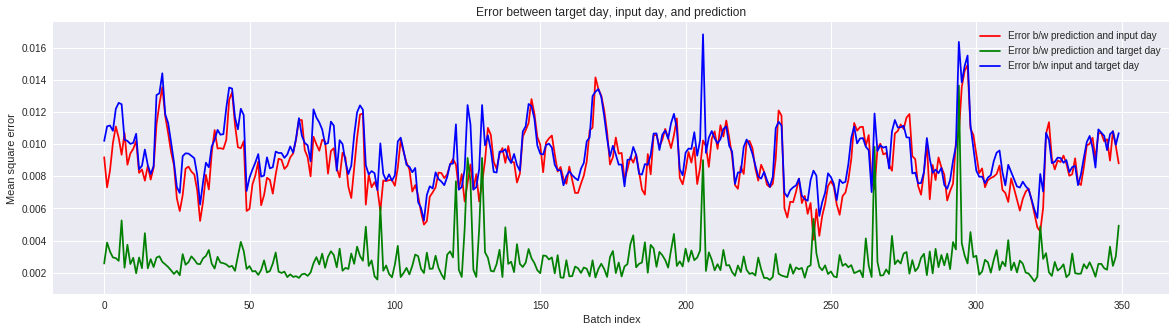

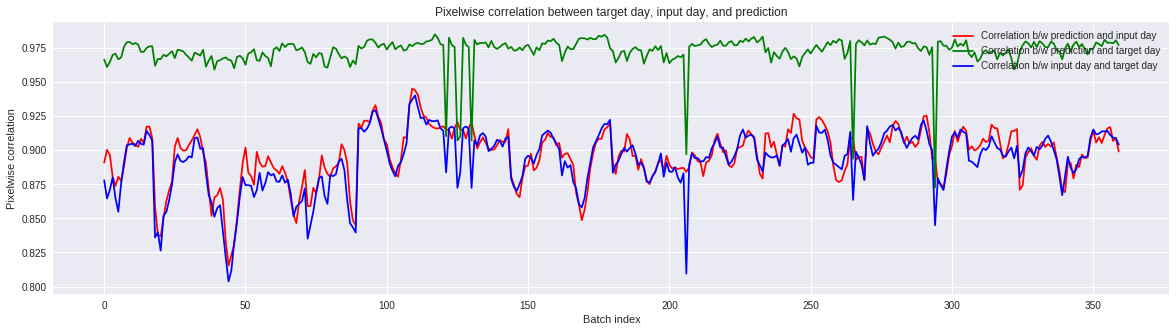

In [0]:
'''
  Showing only a selected list of errors and predictions to prevent hanging up.
'''
plt.figure(figsize=(20,5))
plt.plot(Er1[:350],'r',label = 'Error b/w prediction and input day')
plt.plot(Er2[:350],'g',label = 'Error b/w prediction and target day')
plt.plot(Er[:350],'b',label = 'Error b/w input and target day')
plt.xlabel('Batch index')
plt.ylabel('Mean square error')
plt.title('Error between target day, input day, and prediction')
plt.legend(loc='upper right')
#plt.savefig('ErrorPlot.png')
plt.figure(figsize=(20,5))
plt.plot(Co1[:],'r',label = 'Correlation b/w prediction and input day')
plt.plot(Co2[:],'g',label = 'Correlation b/w prediction and target day')
plt.plot(Co[:],'b',label = 'Correlation b/w input day and target day')
plt.xlabel('Batch index')
plt.ylabel('Pixelwise correlation')
plt.title('Pixelwise correlation between target day, input day, and prediction')
plt.legend(loc='upper right')
#plt.savefig('CorrPlot.png')

In [0]:
print "Mean relative error: ",
print np.mean(np.divide(Er2,Er))
print "Mean relative correlation: ",
print np.mean(np.divide(Co2,Co))

Mean relative error:  0.2912540275315833
Mean relative correlation:  1.0899231216874468


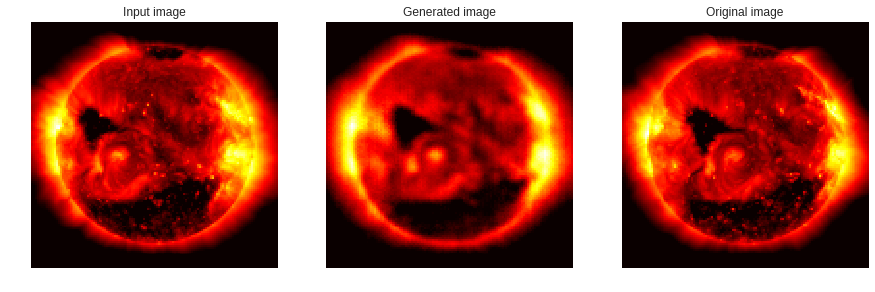

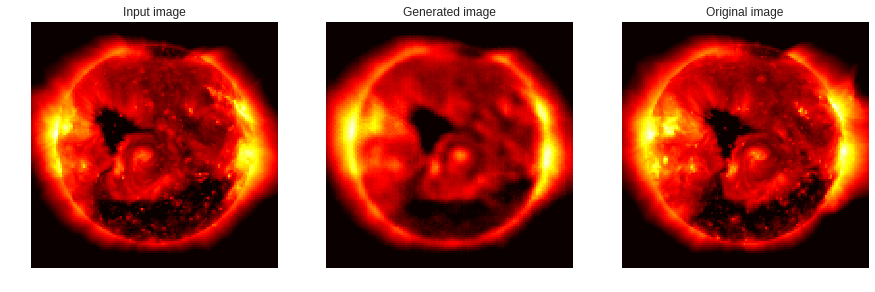

In [0]:
for i in np.arange(0,2): #There are a.shape[0] no of datapoints.
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    plt.imshow(np.reshape(xtest_in[i,:],[128,128]),cmap='hot')
    plt.axis('off')
    plt.title('Input image')
    plt.subplot(1,3,2)
    plt.imshow(np.reshape(a[i,:],[128,128]),cmap='hot')
    plt.axis('off')
    plt.title('Generated image')
    plt.subplot(1,3,3)
    plt.imshow(np.reshape(xtest_out[i,:],[128,128]),cmap='hot')
    plt.axis('off')
    plt.title('Original image')

In [0]:
'''
  Find the total correlation. Find correlation between each pair of generated and 
  target image, and take mean value over a batch.
'''
print xtest_out.shape
print a.shape
co=[]
for i in xrange(xtest_out.shape[0]):
    co.append(corr(xtest_out[i,:],a[i,:]))
print np.mean(co)

(360, 16384)
(360, 16384)
0.9728451707550366


In [0]:
'''
  Plotting a sample discriminator output.
'''
Disc = sess.run(Sun.real_disc,feed_dict={x:xtest_in[118:120,:],x2:xtest_out[118:120,:],dropout:1.0})
Disc2 = sess.run(Sun.fake_disc,feed_dict={x:xtest_in[118:120,:],x2:xtest_out[118:120,:],dropout:1.0})
print Disc.shape
print Disc2.shape

(2, 8, 8, 1)
(2, 8, 8, 1)


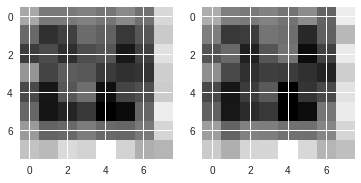

In [0]:
plt.subplot(1,2,1)
plt.imshow(Disc[0,:,:,0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(Disc2[0,:,:,0],cmap='gray')

Text(0.5,0,'Histogram bin value (normalized pixel value)')

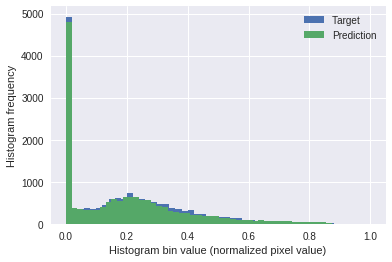

In [0]:
'''
  Plotting histogram of the target and prediction .
'''
_=plt.hist(xtest_out[0,:],bins=50,label='Target')
_=plt.hist(a[0,:],bins=50,label='Prediction')
plt.legend(loc='best')
plt.ylabel('Histogram frequency')
plt.xlabel('Histogram bin value (normalized pixel value)')

In [0]:
xtest_out.shape

(360, 16384)

In [0]:
128*128

16384

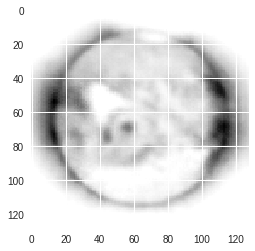

In [0]:
plt.imshow(xtest_out[0,:].reshape([128,128]))
plt.imshow(a[0,:].reshape([128,128]))


In [0]:
img_in = xtest_in.reshape([xtest_in.shape[0],128,128])
img_out=xtest_out.reshape([xtest_in.shape[0],128,128])
img_a  =        a.reshape([xtest_in.shape[0],128,128])

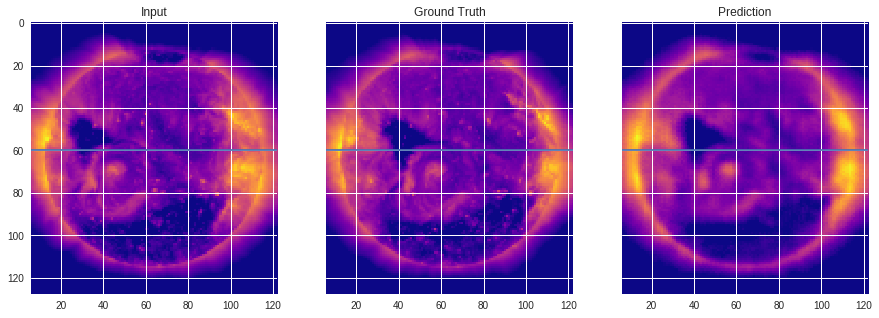

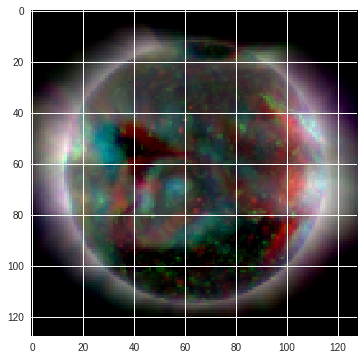

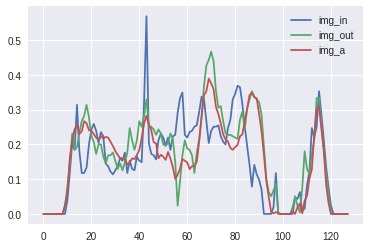

In [0]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,5))
ax1.imshow(img_in[0,:,:], interpolation='nearest', cmap='plasma')
ax1.set_xlim(0,img_a.shape[1])
ax1.plot([0,128],[60,60])
ax1.set_title('Input')

ax2.imshow(img_out[0,:,:], interpolation='nearest', cmap='plasma')
ax2.plot([0,128],[60,60])
ax2.set_xlim(0,img_a.shape[1])
ax2.set_title('Ground Truth')

ax3.imshow(img_a[0,:,:],  interpolation='nearest', cmap='plasma')
ax3.set_xlim(0,img_a.shape[1])
ax3.plot([0,128],[60,60])
ax3.set_title('Prediction')


rgb = np.zeros([img_in.shape[1],img_in.shape[2],3])
rgb[:,:,0] = img_in[0,:,:]
rgb[:,:,1] = img_out[0,:,:]
rgb[:,:,2] = img_a[0,:,:]
plt.figure(figsize=(6,6))
plt.imshow(rgb, interpolation='nearest')

plt.show()
plt.plot(img_in[0,:,60], label='img_in')
plt.plot(img_out[0,:,60], label='img_out')
plt.plot(img_a[0,:,60],label='img_a')
plt.legend()


In [0]:
import cv2

In [0]:
flow	=	cv.calcOpticalFlowFarneback(img_in, next, flow, pyr_scale, levels, winsize, iterations, poly_n, poly_sigma, flags	)
